In [ ]:
# Load NeuroKit and other useful packages
!pip install neurokit2
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

In [ ]:
# Retrieve ECG data from data folder (sampling rate= 1000 Hz)
ecg_signal = nk.data(dataset="ecg_3000hz")['ECG']
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=3000)

(15,)
(16,)


In [ ]:
rpeaks

{'ECG_R_Peaks': array([ 3000,  6355,  9851, 13396, 16757, 20188, 23343, 26356, 29150,
        31990, 35314, 38921, 42407, 45714, 49272]), 'sampling_rate': 3000}

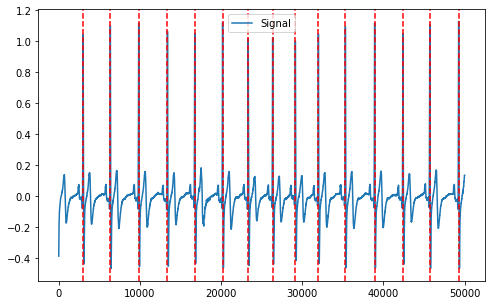

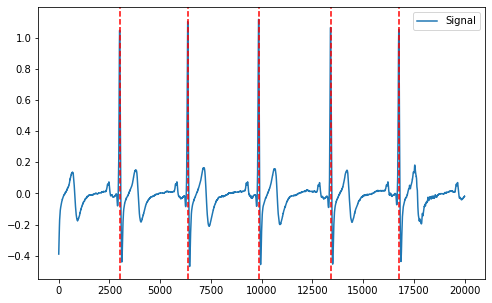

In [ ]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:20000])

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/dv_training"

/content/drive/MyDrive/dv_training


In [ ]:
from scipy.io import wavfile
import numpy as np
samplerate, data = wavfile.read("a0001.wav")
length = data.shape[0] / samplerate
samplerate_ecg, data_ecg = wavfile.read("a1ecg.wav")
length_ecg = data_ecg.shape[0] / samplerate_ecg
samplerate_ecg_unsampled, data_ecg_unsampled = wavfile.read("a1ecg_unsampled.wav")
length_ecg_unsampled = data_ecg_unsampled.shape[0] / samplerate_ecg_unsampled

In [ ]:
print(f"length = {length}")
print(f"samplerate = {samplerate}")
print(f"shape = {data.shape}")
print(f"length = {length_ecg}")
print(f"samplerate = {samplerate_ecg}")
print(f"shape = {data_ecg.shape}")
print(f"length = {length_ecg_unsampled}")
print(f"samplerate = {samplerate_ecg_unsampled}")
print(f"shape = {data_ecg_unsampled.shape}")

length = 35.666
samplerate = 2000
shape = (71332,)
length = 35.666
samplerate = 2000
shape = (71332,)
length = 142.664
samplerate = 1000
shape = (142664,)


In [ ]:
from sklearn.preprocessing import normalize
data_ecg_normalized = normalize(data_ecg.reshape(1, -1), norm = "max")
data_normalized = normalize(data.reshape(1, -1), norm = "max")

In [ ]:
data_ecg.shape

(71332,)

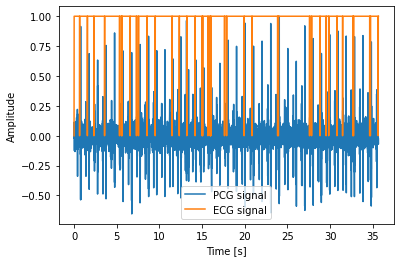

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data_normalized[0], label="PCG signal")
plt.plot(time, data_ecg_normalized[0], label="ECG signal")
# plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

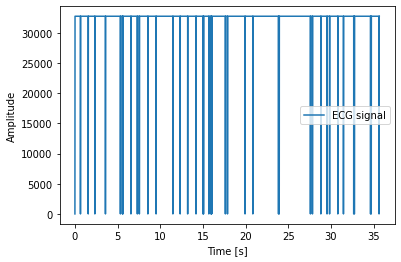

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data_ecg, label="ECG signal")
# plt.plot(time, data_ecg_unsampled, label="Unsampled ECG signal")
# plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

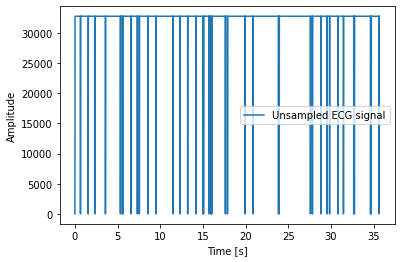

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data_ecg_unsampled.shape[0])
# plt.plot(time, data_ecg, label="ECG signal")
plt.plot(time, data_ecg_unsampled, label="Unsampled ECG signal")
# plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
data_ecg_unsampled

array([    0,     0, 32767, ..., 32767, 32767, 32767], dtype=int16)

In [ ]:
import pandas as pd
edf = pd.read_csv("/content/drive/MyDrive/dv_training/downsampled_a0001.csv")
x = edf.to_numpy()
x = x.reshape(1, -1)
print(x)
print(x.shape)

[[15 46 94 ... 15 13 14]]
(1, 71331)


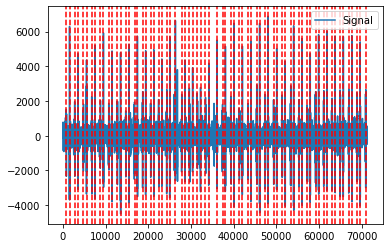

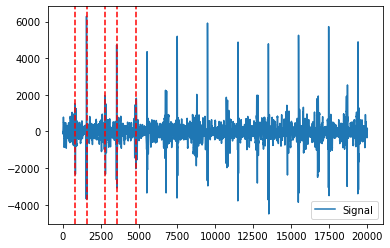

In [ ]:
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(data, sampling_rate=2000)
# Visualize R-peaks in PCG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], data)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], data[:20000])

In [ ]:
rpeaks['ECG_R_Peaks']

array([  785,  1550,  2754,  3530,  4820,  5530,  6742,  7512,  8726,
        9500, 10736, 11508, 12736, 13501, 14716, 15482, 16778, 17462,
       18697, 19393, 20608, 21307, 22426, 23193, 24341, 25037, 26368,
       27847, 28618, 29625, 30395, 31478, 32256, 33415, 34183, 36120,
       37412, 38086, 39404, 40080, 41324, 42067, 43385, 44059, 45424,
       46096, 47428, 48094, 49361, 50098, 51402, 52084, 53391, 54070,
       55340, 56033, 57266, 57970, 59232, 59918, 61147, 61844, 63076,
       63784, 64954, 65727, 67010, 67708, 68963, 69671, 71000])

In [ ]:
# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(data, rpeaks, sampling_rate=2000, method="dwt", show=False, show_type='bounds_T')

In [ ]:
# end T wave / T wave offset
t_wave_offset = waves_dwt['ECG_T_Offsets']
print(t_wave_offset)

[975, 1801, 3123, 3833, 5249, 5907, 6978, 7712, 8978, 9797, 10927, 11743, 13098, 13876, 14893, 15820, 17099, 17689, 19073, 19692, 20794, 21601, 22616, 23365, 24646, 25271, 26854, 28111, 28838, 29807, 30625, 31899, 32717, 33689, 34392, 36299, 37880, 38474, 39820, 40489, 41515, 42561, 43622, 44389, 45823, 46451, 47686, 48596, 49825, 50327, 51634, 52422, 53804, 54505, 55661, 56460, 57673, 58359, 59488, 60099, 61415, 62242, 63550, 64216, 65354, 66117, 67312, 68027, 69458, 70044, 71283]


In [ ]:
def get_r_peak_t_end(data, samplerate):
    # samplerate, data = wavfile.read(data)
    # wav = data.tolist()
    _, rpeaks = nk.ecg_peaks(data, sampling_rate=samplerate)
    signal_dwt, waves_dwt = nk.ecg_delineate(data, rpeaks, sampling_rate=2000, method="dwt", show=False, show_type='bounds_T')
    r_peak = rpeaks['ECG_R_Peaks']
    t_end = waves_dwt['ECG_T_Offsets']
    return [r_peak, t_end]

In [ ]:
get_r_peak_t_end("a1ecg.wav")

[array([ 4661, 11197, 14626, 19016, 30078, 32009, 47711, 65416, 69366]),
 [nan, 13116, 15093, nan, 31371, nan, nan, nan, nan]]

In [ ]:
import os
import pandas as pd
r_peak = []
t_end = []
f_names = []
directory = "/content/drive/MyDrive/dv_training/downsampled_training_a/"
error_files = ["/content/drive/MyDrive/dv_training/downsampled_training_a/downsampled_a0013.csv",
               "/content/drive/MyDrive/dv_training/downsampled_training_a/downsampled_a0077.csv",
               "/content/drive/MyDrive/dv_training/downsampled_training_a/downsampled_a0084.csv",
               ]
# for filename in sorted(os.listdir(directory)):
#     f = os.path.join(directory, filename)
#     # checking if it is a file
#     if os.path.isfile(f):        
#         with open(f) as file:
#             print(f)
#             a = get_r_peak_t_end(f)
#             r_peak.append(a[0])
#             t_end.append(a[1])
#             f_names.append(filename)

In [ ]:
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if filename not in f_names:
        if os.path.isfile(f):
            print(f)
            if f not in error_files and f:
                try:
                    edf = pd.read_csv(f)
                    x = edf.to_numpy()
                    x = x.tolist()
                    x = [item for sublist in x for item in sublist]
                    # x = [i.replace(0, 1) for i in x]
                    # x = x.reshape(-1, 1)
                    print(x)
                    a = get_r_peak_t_end(x, 2000)
                    r_peak.append(a[0])
                    t_end.append(a[1])
                    f_names.append(filename)
                except:
                    pass

In [ ]:
import pandas as pd
annotations_df = pd.DataFrame(
    {
        "name" : f_names, 
        "r_peak" : r_peak, 
        "t_end" : t_end
    }
)
annotations_df

,name,r_peak,t_end
0,downsampled_a0001.csv,"[1300, 2654, 4650, 6658, 9108, 10637, 12650, 1...","[2130, 3363, 5391, 7162, 9329, 11153, 13360, 1..."
1,downsampled_a0002.csv,"[859, 2342, 3883, 5426, 6942, 8436, 9938, 1146...","[1388, 2891, 4121, 5922, 7438, 9078, 10181, 11..."
2,downsampled_a0003.csv,"[1098, 1936, 3102, 4513, 5561, 6725, 7781, 925...","[1403, 2250, 3544, 4952, 6084, 7009, 8284, 958..."
3,downsampled_a0004.csv,"[1285, 2156, 3769, 6553, 8003, 10072, 12340, 1...","[1828, 2366, 4370, 7121, 8181, 10318, 12495, 1..."
4,downsampled_a0005.csv,"[1702, 2917, 4335, 7167, 10019, 11529, 14517, ...","[2035, 3257, 4658, 7524, 10424, 12111, 14913, ..."
...,...,...,...
378,downsampled_a0405.csv,"[1574, 3423, 5132, 6710, 8496, 10249, 11894, 1...","[2081, 3896, 5316, 7300, 9017, 10481, 12202, 1..."
379,downsampled_a0406.csv,"[2251, 4267, 6336, 8570, 10780, 12836, 14682, ...","[2679, 4815, 7081, 9395, 11529, 13194, 15258, ..."
380,downsampled_a0407.csv,"[1519, 2769, 4157, 5612, 6927, 8290, 9948, 112...","[1890, 3471, 4830, 6200, 7203, 8902, 10541, 11..."
381,downsampled_a0408.csv,"[981, 1617, 3626, 5524, 7277, 8011, 9201, 1100...","[1839, 2144, 4078, 5669, 8107, 8788, 9912, 116..."


In [ ]:
# annotations_df.to_csv("annotations.csv")
annotations_df.to_csv("annotations_full.csv")

NameError: ignored

In [ ]:
directory = "/content/drive/MyDrive/dv_training/denoised_signals"

In [ ]:
wav_data = []
import os
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):        
        with open(f) as file:
            print(f)
            samplerate, data = wavfile.read(f)
            wav_data.append(list(data))

/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0001.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0002.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0003.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0004.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0005.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0006.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0007.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0008.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0009.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0010.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0011.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0012.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0013.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0014.wav
/conte

In [ ]:
# wav_data = []
# for filename in sorted(os.listdir(directory)):
#     f = os.path.join(directory, filename)
#     # checking if it is a file
#     # print(filename)
#     if filename in list(annotations_df['name']):
#         edf = pd.read_csv(f)
#         x = edf.to_numpy()
#         x = x.tolist()
#         x = [item for sublist in x for item in sublist]
#         # x = [i.replace(0, 1) for i in x]
#         # x = x.reshape(-1, 1)
#         print(filename)
#         print(x)
#         wav_data.append(x)
#     else:
#         print("GOOGOOGAAGAA")

In [ ]:
# import itertools
# pad_token = 0
# with_padding = list(zip(*itertools.zip_longest(*wav_data, fillvalue=pad_token)))
# for i in range(len(with_padding)):
#     with_padding[i] = list(with_padding[i])
# print(with_padding[0:2])

In [ ]:
len(wav_data)

3240

In [ ]:
wav_data_chunks = [wav_data[x:x+500] for x in range(0, len(wav_data), 500)]

In [ ]:
i = 0
for chunk in wav_data_chunks:
    a = pd.DataFrame(chunk)
    a.to_csv(".".join([str(i), "csv"]), header = False, index = None)
    i+=1

In [ ]:
adf = pd.read_csv("annotations_full.csv")
adf

,Unnamed: 0,name,r_peak,t_end
0,0,downsampled_a0001.csv,[ 1300 2654 4650 6658 9108 10637 12650 132...,"[2130, 3363, 5391, 7162, 9329, 11153, 13360, 1..."
1,1,downsampled_a0002.csv,[ 859 2342 3883 5426 6942 8436 9938 114...,"[1388, 2891, 4121, 5922, 7438, 9078, 10181, 11..."
2,2,downsampled_a0003.csv,[ 1098 1936 3102 4513 5561 6725 7781 92...,"[1403, 2250, 3544, 4952, 6084, 7009, 8284, 958..."
3,3,downsampled_a0004.csv,[ 1285 2156 3769 6553 8003 10072 12340 140...,"[1828, 2366, 4370, 7121, 8181, 10318, 12495, 1..."
4,4,downsampled_a0005.csv,[ 1702 2917 4335 7167 10019 11529 14517 159...,"[2035, 3257, 4658, 7524, 10424, 12111, 14913, ..."
...,...,...,...,...
378,378,downsampled_a0405.csv,[ 1574 3423 5132 6710 8496 10249 11894 135...,"[2081, 3896, 5316, 7300, 9017, 10481, 12202, 1..."
379,379,downsampled_a0406.csv,[ 2251 4267 6336 8570 10780 12836 14682 163...,"[2679, 4815, 7081, 9395, 11529, 13194, 15258, ..."
380,380,downsampled_a0407.csv,[ 1519 2769 4157 5612 6927 8290 9948 112...,"[1890, 3471, 4830, 6200, 7203, 8902, 10541, 11..."
381,381,downsampled_a0408.csv,[ 981 1617 3626 5524 7277 8011 9201 110...,"[1839, 2144, 4078, 5669, 8107, 8788, 9912, 116..."


In [ ]:
a_wavs = list(adf["name"])
a_wavs

['downsampled_a0001.csv',
 'downsampled_a0002.csv',
 'downsampled_a0003.csv',
 'downsampled_a0004.csv',
 'downsampled_a0005.csv',
 'downsampled_a0006.csv',
 'downsampled_a0007.csv',
 'downsampled_a0008.csv',
 'downsampled_a0009.csv',
 'downsampled_a0010.csv',
 'downsampled_a0011.csv',
 'downsampled_a0012.csv',
 'downsampled_a0014.csv',
 'downsampled_a0015.csv',
 'downsampled_a0016.csv',
 'downsampled_a0017.csv',
 'downsampled_a0018.csv',
 'downsampled_a0019.csv',
 'downsampled_a0020.csv',
 'downsampled_a0021.csv',
 'downsampled_a0022.csv',
 'downsampled_a0023.csv',
 'downsampled_a0024.csv',
 'downsampled_a0025.csv',
 'downsampled_a0026.csv',
 'downsampled_a0027.csv',
 'downsampled_a0028.csv',
 'downsampled_a0029.csv',
 'downsampled_a0030.csv',
 'downsampled_a0031.csv',
 'downsampled_a0032.csv',
 'downsampled_a0033.csv',
 'downsampled_a0034.csv',
 'downsampled_a0035.csv',
 'downsampled_a0036.csv',
 'downsampled_a0037.csv',
 'downsampled_a0038.csv',
 'downsampled_a0039.csv',
 'downsample

In [ ]:
a_wavs1 = [name.split(".") for name in a_wavs]
a_wavs2 = [name[0].split("_")[1] for name in a_wavs1]
len(a_wavs2)

383

In [ ]:
directory

'/content/drive/MyDrive/dv_training/denoised_signals'

In [ ]:
segmentation_training = []
import os
wav_dir = sorted(os.listdir(directory))
wav_training = []
for dir in wav_dir:
    for name in a_wavs2:
        if dir.find(name) != -1:
            wav_training.append("/".join([directory, dir]))
            break
# print(wav_training)          
# print(len(wav_training))  
for filename in wav_training:
    f = filename
    # checking if it is a file
    if os.path.isfile(f):        
        with open(f) as file:
            print(f)
            samplerate, data = wavfile.read(f)
            segmentation_training.append(list(data))

/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0001.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0002.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0003.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0004.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0005.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0006.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0007.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0008.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0009.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0010.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0011.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0012.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0014.wav
/content/drive/MyDrive/dv_training/denoised_signals/denoised_a0015.wav
/conte

In [ ]:
sdf = pd.DataFrame(segmentation_training)
sdf.to_csv("segmentation_training.csv", header = False, index = None)

In [ ]:
!pwd

/content/drive/MyDrive/dv_training


In [ ]:
# ["denoised_c0005.wav", "denoised_e00020.wav", "denoised_e00104.wav", "denoised_e00116.wav", "denoised_e00127.wav", "denoised_e00153.wav", "denoised_e00181.wav", "denoised_e00276.wav", "denoised_e00315.wav"]